(1000, 1) (1000, 1)


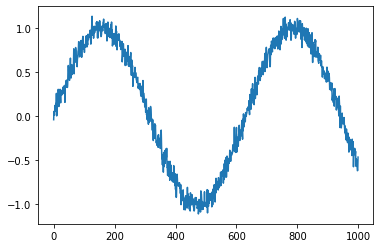

In [56]:
import numpy as np
import matplotlib.pyplot as plt

T = 1000

time = np.arange(0,T).reshape(-1,1)
fn = np.sin(time/100).reshape(-1,1)

noise = np.random.randn(len(time), 1)/15
fn = fn+noise
print(fn.shape, time.shape)
plt.plot(time, fn)
plt.show()

In [111]:
tau = 5
data = np.zeros((time.shape[0], tau))
for a in range(0, len(data)):
    data[a:a+tau] = fn[a:a+tau].squeeze()


ValueError: could not broadcast input array from shape (4) into shape (4,5)

(5,)

In [109]:
fn[0:5].squeeze()

array([-0.03780025,  0.05676764,  0.02136536,  0.01367565,  0.12410561])

In [106]:
data[0]

array([0., 0., 0., 0., 0.])